In [108]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [109]:
#10 ações (k=10). 
#Os actions values (q*(a)) são selecionados de acorda com uma distribuição gaussiana de média 0 e variânica 1.
#Quando um método de aprendizado aplicado selecionar uma ação A_t num dado instante de tempo t,
#a recompensa obtida, R_t, será selecionada de uma distribuição gaussina com média q(A_t) e variância 1.
mu = 0.0
sigma_action_values = 1.0
sigma_rewards = 1.0

#actions
k = 10

#rodadas
runs = 2000

#steps
time_steps = 1000

#epsilon parameter
epsilon = [0, 0.01, 0.1]


#Inicializando um array que guardará a média das recompensas de cada rodada.
average_rewards = np.zeros(shape=(len(epsilon),time_steps), dtype=float) 

#Inicializando um array que guardará se a ação tomada foi ótima na rodada.
optimal_actions = np.zeros(shape=(len(epsilon),time_steps), dtype=float)

for e in epsilon :
    run = 0
    while (run < runs):

        #true_action_values = [q*(1), q*(2), ..., q*(10)]
        true_action_values = np.random.normal(loc=mu, scale=sigma_action_values, size=(k))
        optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]

        #Inicializando as variáveis: actions values Q(a) = 0 com a de 1 até 10 e número de vezes que a ação a 
        #foi selecionada N(a) = 0.
        #estimated_action_values = [[Q(1), Q(2), ..., Q(10)],[N(1), N(2), ..., N(10)]]
        estimated_action_values = np.zeros(shape=(2, k), dtype=float) 

        #Seleciona steps aleatórios para realizar exploração com base no parâmetro epsilon
        exploration_steps = np.random.randint(0, time_steps - 1, size= int(e * time_steps))

        time_step = 0
        while ( time_step  < time_steps ):
            q, n = estimated_action_values[0], estimated_action_values[1]

            if (time_step in exploration_steps) :
                #seleciona uma ação aleatória
                action = random.randint(0, 9)
            else :
                #captura os index do valor máximo de action value num instante t e seleciona um valor aleatório do resultado
                actions_maximizes_estimated_action_value, = np.where(q == np.amax(q))
                action = np.random.choice(actions_maximizes_estimated_action_value, size=None, replace=False, p=None)
                
            if (action == optimal_action):
                optimal_actions[epsilon.index(e)][time_step] = optimal_actions[epsilon.index(e)][time_step] + 1 /runs

            #aplica o bandits para gerar uma recompensa
            reward = np.random.normal(loc=true_action_values[action], scale=sigma_rewards)

            #atualiza o vetor de recompensa média por step
            average_rewards[epsilon.index(e)][time_step] = average_rewards[epsilon.index(e)][time_step] + reward / runs

            #atualiza o vetor N(a) com N(a=A_(t))_(t+1) = N(a=A_(t))_(t) + 1
            n[action] = n[action] + 1

            #atualiza o vetor Q(a) com Q(a=A_(t))_(t+1) = Q(a=A_(t))_(t) + (R(a=A_(t))_(t) - Q(a=A_(t))_(t)) / N(a=A_(t))
            q[action] = q[action] + (reward - q[action]) / n[action]

            time_step = time_step + 1



        run = run + 1
    

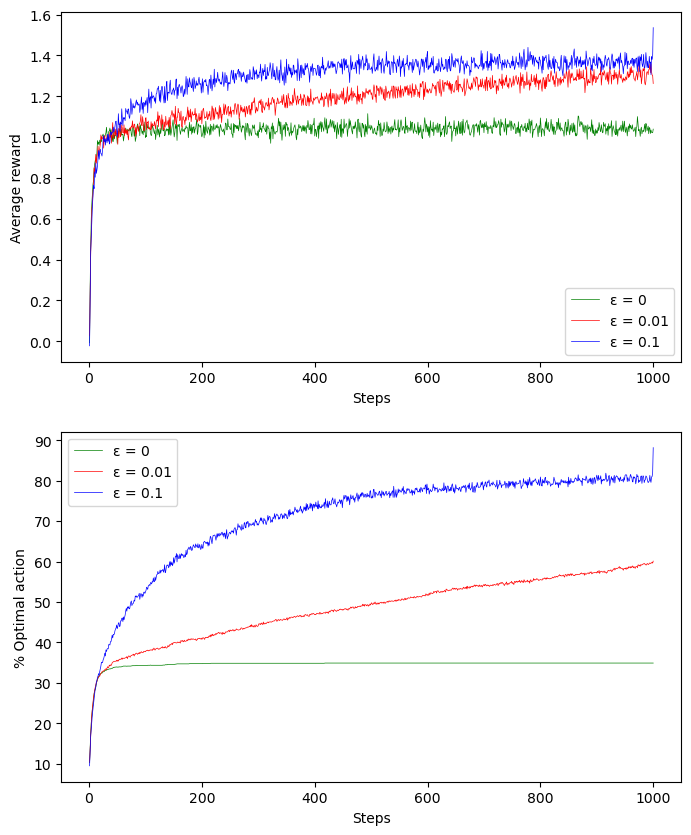

In [116]:
linecolors = ['green', 'red', 'blue']
labels = ['\u03B5 = 0', '\u03B5 = 0.01', '\u03B5 = 0.1']
x = np.linspace(1, time_steps, time_steps, endpoint=True)


fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=False,
                                    figsize=(8, 10))
for e in epsilon:
    ax0.plot(x, average_rewards[epsilon.index(e)], linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])
    ax1.plot(x, optimal_actions[epsilon.index(e)]*100, linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])

ax0.set_ylabel('Average reward')
ax1.set_ylabel('% Optimal action')
ax0.set_xlabel('Steps')
ax1.set_xlabel('Steps')
ax0.legend()
ax1.legend()
plt.show()